In [1]:
#MODEL TRAINED. BY AMAZON
#Libraries
import boto3
import io
from PIL import Image, ImageDraw, ExifTags, ImageColor

import pandas as pd
import json

In [2]:
bucket="promodronefaces"
photo="test/c9.jpg"

In [3]:
client=boto3.client('rekognition')
# Load image from S3 bucket
s3_connection = boto3.resource('s3')
s3_object = s3_connection.Object(bucket,photo)
s3_response = s3_object.get()
stream = io.BytesIO(s3_response['Body'].read())
image=Image.open(stream)

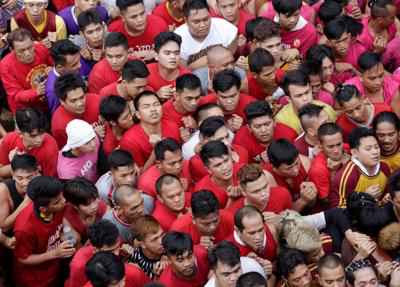

In [40]:
image

In [5]:
#Call DetectFaces 
response = client.detect_faces(Image={'S3Object': {'Bucket': bucket, 'Name': photo}}, Attributes=['ALL'])
imgWidth, imgHeight = image.size  
draw = ImageDraw.Draw(image)  

In [6]:
#EXTRA JSON CONVERSION AND SAVE
json_object = json.dumps(response, indent = 4)  
#print(json_object)

jsondata = json.loads(json_object)


import os
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))
#type(response)

with open('/Users/josemanuelolmedomtz/Desktop/archivoz.json', 'w') as json_file:
    json.dump(response, json_file)


In [42]:
titles = []
lstAgeMin = []
lstAgeMax = []
lstSmile = []
lstEyeGlasses = []
lstSunGlasses = []
lstGender = []
lstBeard = []
lstMustache = []
lstEyesOpen = []
lstMouthOpen = []


for face in response['FaceDetails']:
    lstAgeMin.append(str(face['AgeRange']['Low']))
    lstAgeMax.append(str(face['AgeRange']['High']))
    lstSmile.append(str(face['Smile']['Value']))
    lstEyeGlasses.append(str(face['Eyeglasses']['Value']))
    lstSunGlasses.append(str(face['Sunglasses']['Value']))
    lstGender.append(str(face['Gender']['Value']))
    lstBeard.append(str(face['Beard']['Value']))
    lstMustache.append(str(face['Mustache']['Value']))
    lstEyesOpen.append(str(face['EyesOpen']['Value']))
    lstMouthOpen.append(str(face['MouthOpen']['Value']))

    

In [43]:
pist = pd.DataFrame(
    {'AgeMin': lstAgeMin,
     'AgeMax': lstAgeMax,
     'Smile': lstSmile,
     'EyeGlasses': lstEyeGlasses,
     'SunGlasses': lstSunGlasses,
     'Gender': lstGender,
     'Beard': lstBeard,
     'Mustache': lstMustache,
     'EyesOpen': lstEyesOpen,
     'MouthOpen': lstMouthOpen
    })


In [48]:
pist.to_csv("~/Desktop/datacondensed.txt", index=False, sep ='\t')


In [44]:
# calculate and display bounding boxes for each detected face       
print('Detected faces for ' + photo)    
for faceDetail in response['FaceDetails']:
    print('The detected face is between ' + str(faceDetail['AgeRange']['Low']) + ' and ' + str(faceDetail['AgeRange']['High']) + ' years old'+ "and is " + str(faceDetail['Gender']['Value']))
    print(faceDetail.keys())
    df = pd.DataFrame.from_dict(faceDetail.keys())
    df.to_csv("~/Desktop/datos.txt", index=False)
    box = faceDetail['BoundingBox']
    left = imgWidth * box['Left']
    top = imgHeight * box['Top']
    width = imgWidth * box['Width']
    height = imgHeight * box['Height']
    
    print('Left: ' + '{0:.0f}'.format(left))
    print('Top: ' + '{0:.0f}'.format(top))
    print('Face Width: ' + "{0:.0f}".format(width))
    print('Face Height: ' + "{0:.0f}".format(height))
    points = ((left,top),(left + width, top),(left + width, top + height),(left , top + height), (left, top))
    draw.line(points, fill='#00d400', width=2)

Detected faces for test/c9.jpg
The detected face is between 27 and 43 years oldand is Male
dict_keys(['BoundingBox', 'AgeRange', 'Smile', 'Eyeglasses', 'Sunglasses', 'Gender', 'Beard', 'Mustache', 'EyesOpen', 'MouthOpen', 'Emotions', 'Landmarks', 'Pose', 'Quality', 'Confidence'])
Left: 241
Top: 217
Face Width: 23
Face Height: 30
The detected face is between 13 and 25 years oldand is Male
dict_keys(['BoundingBox', 'AgeRange', 'Smile', 'Eyeglasses', 'Sunglasses', 'Gender', 'Beard', 'Mustache', 'EyesOpen', 'MouthOpen', 'Emotions', 'Landmarks', 'Pose', 'Quality', 'Confidence'])
Left: 216
Top: 260
Face Width: 26
Face Height: 26
The detected face is between 23 and 35 years oldand is Male
dict_keys(['BoundingBox', 'AgeRange', 'Smile', 'Eyeglasses', 'Sunglasses', 'Gender', 'Beard', 'Mustache', 'EyesOpen', 'MouthOpen', 'Emotions', 'Landmarks', 'Pose', 'Quality', 'Confidence'])
Left: 246
Top: 175
Face Width: 23
Face Height: 29
The detected face is between 31 and 47 years oldand is Female
dict_ke

In [ ]:
for cara in response['FaceDetails']:
    print('The detected face is between ' + str(faceDetail['AgeRange']['Low']) + ' and ' + str(faceDetail['AgeRange']['High']) + ' years old'+ "and is " + str(faceDetail['Gender']['Value']))
    print(faceDetail.keys())
    df = pd.DataFrame.from_dict(faceDetail.keys())
    df.to_csv("~/Desktop/datos.txt", index=False)
    box = faceDetail['BoundingBox']
    left = imgWidth * box['Left']
    top = imgHeight * box['Top']
    width = imgWidth * box['Width']
    height = imgHeight * box['Height']
    
    print('Left: ' + '{0:.0f}'.format(left))
    print('Top: ' + '{0:.0f}'.format(top))
    print('Face Width: ' + "{0:.0f}".format(width))
    print('Face Height: ' + "{0:.0f}".format(height))
    points = ((left,top),(left + width, top),(left + width, top + height),(left , top + height), (left, top))
    draw.line(points, fill='#00d400', width=2)

In [ ]:
image.show()

In [ ]:
faces_count = len(response['FaceDetails'])
print("faces detected: " + str(faces_count))

In [ ]:
def show_faces(photo,bucket):
    #Conexion con rekognition
    client=boto3.client('rekognition')

    # Load image from S3 bucket
    s3_connection = boto3.resource('s3')
    s3_object = s3_connection.Object(bucket,photo)
    s3_response = s3_object.get()
    #Se obtiene la imagen del s3
    stream = io.BytesIO(s3_response['Body'].read())
    #Se abre
    image=Image.open(stream)
    
    #Call DetectFaces 
    response = client.detect_faces(Image={'S3Object': {'Bucket': bucket, 'Name': photo}},
        Attributes=['ALL'])

    imgWidth, imgHeight = image.size  
    draw = ImageDraw.Draw(image)  
                    
    
    # calculate and display bounding boxes for each detected face       
    print('Detected faces for ' + photo)    
    for faceDetail in response['FaceDetails']:
        #print('The detected face is between ' + str(faceDetail['AgeRange']['Low']) 
         #     + ' and ' + str(faceDetail['AgeRange']['High']) + ' years old'+ "and is " + str(faceDetail['Gender']['Value']))
        #print(faceDetail.keys())
        df = pd.DataFrame.from_dict(faceDetail.keys())
        df.to_csv("~/Desktop/datos.txt", index=False)

        box = faceDetail['BoundingBox']
        left = imgWidth * box['Left']
        top = imgHeight * box['Top']
        width = imgWidth * box['Width']
        height = imgHeight * box['Height']
                

        # print('Left: ' + '{0:.0f}'.format(left))
        # print('Top: ' + '{0:.0f}'.format(top))
        # print('Face Width: ' + "{0:.0f}".format(width))
        # print('Face Height: ' + "{0:.0f}".format(height))

        points = (
            (left,top),
            (left + width, top),
            (left + width, top + height),
            (left , top + height),
            (left, top)

        )
        draw.line(points, fill='#00d400', width=2)

        # Alternatively can draw rectangle. However you can't set line width.
        #draw.rectangle([left,top, left + width, top + height], outline='#00d400') 

    image.show()

    return len(response['FaceDetails'])


In [ ]:
def main():
    bucket="promodronefaces"
    photo="test/c13.jpg"

    faces_count=show_faces(photo,bucket)
    print("faces detected: " + str(faces_count))

if __name__ == "__main__":
    main()